## Colab

In [15]:
!wget --no-check-certificate https://storage.googleapis.com/platzi-tf2/sign-language-img.zip \
-o /tmp/sign-language-img.zip


## Local

In [ ]:
!python -m wget -o C:/Users/celio/OneDrive/Escritorio/programación/platzi/CursoProfesionaldeRedesNeuronalesconTensorFlow/archivos_clase/archivos https://storage.googleapis.com/platzi-tf2/sign-language-img.zip

## Colab

In [16]:
import os
import zipfile

local_zip = '/content/sign-language-img.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/sign-language-img')
zip_ref.close()
os.remove(local_zip)

## Local

In [11]:

import os
import zipfile

local_zip = 'C:/Users/celio/OneDrive/Escritorio/programación/platzi/CursoProfesionaldeRedesNeuronalesconTensorFlow/archivos_clase/archivos/sign-language-img.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('C:/Users/celio/OneDrive/Escritorio/programación/platzi/CursoProfesionaldeRedesNeuronalesconTensorFlow/archivos_clase/archivos/sign-language-img')
zip_ref.close()
os.remove(local_zip)

In [17]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import string
import tensorflow as tf
from tensorflow.keras import regularizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## Colab

In [20]:
train_dir = '/content/sign-language-img/Train'
test_dir = '/content/sign-language-img/Test'

## Local

In [19]:
train_dir = 'la local'
test_dir = '/content/sign-language-img/Test'

In [21]:
train_datagen = ImageDataGenerator(rescale=1/255)
test_datagen = ImageDataGenerator(rescale=1/255, validation_split=0.2)

In [22]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(28, 28),
    batch_size = 128,
    class_mode='categorical',
    color_mode='grayscale',
    subset='training',
    )

validation_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(28, 28),
    batch_size = 128,
    class_mode='categorical',
    color_mode='grayscale',
    subset='validation',
    )

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(28, 28),
    batch_size = 128,
    class_mode='categorical',
    color_mode='grayscale',
    )


Found 27455 images belonging to 24 classes.
Found 1425 images belonging to 24 classes.
Found 7172 images belonging to 24 classes.


In [23]:
classes =[char for char in string.ascii_uppercase if char !='J' if char !='Z']

In [24]:
classes

['A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y']

In [25]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(10,10))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img[:,:,0])
        ax.axis('off')
    plt.tight_layout()
    plt.show()

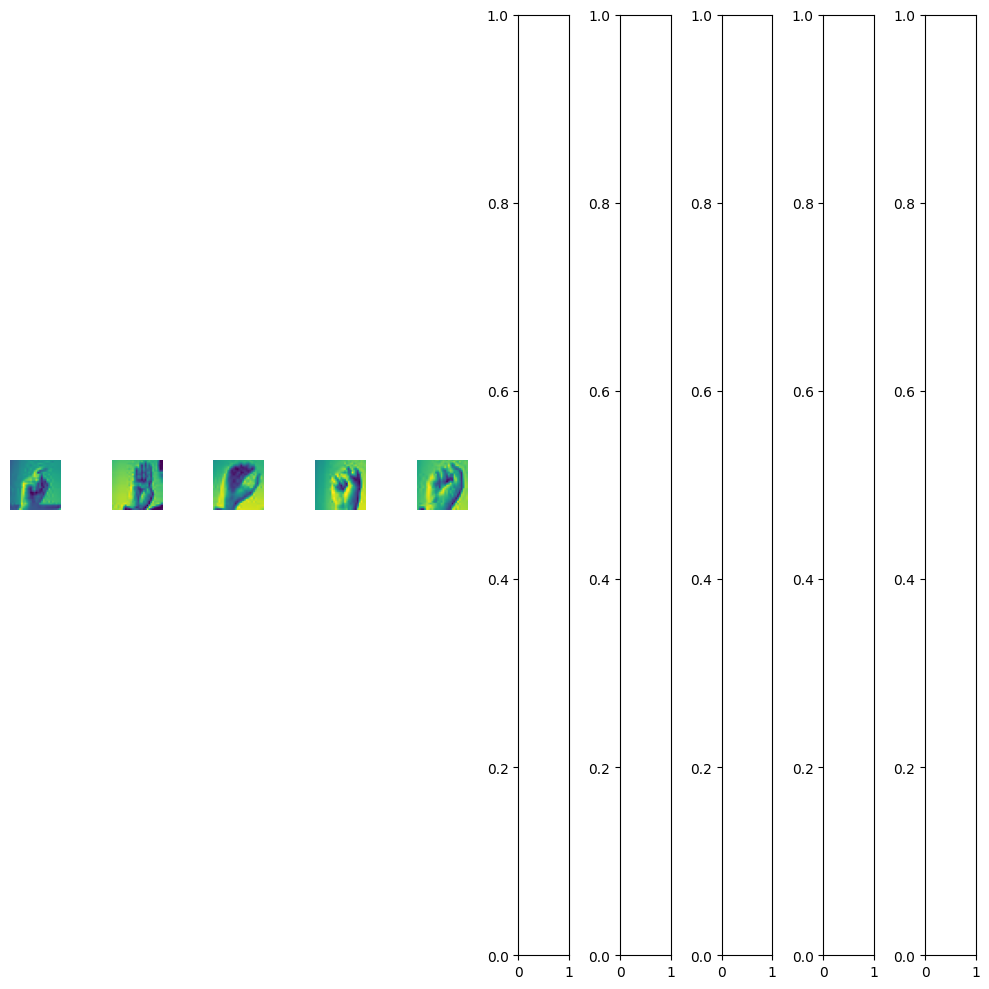

In [26]:
sample_training_images, _ = next(train_generator)
plotImages(sample_training_images[:5])

In [27]:
model_base = tf.keras.models.Sequential([
              tf.keras.layers.Flatten(input_shape= (28, 28, 1)),
              tf.keras.layers.Dense(256, activation = "relu"),
              tf.keras.layers.Dense(128, activation = "relu"),
              tf.keras.layers.Dense(len(classes), activation = "softmax")
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [28]:
model_base.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         200,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 24)                  │           3,096 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 236,952 (925.59 KB)

 Trainable params: 236,952 (925.59 KB)

 Non-trainable params: 0 (0.00 B)

In [29]:
model_base.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model_base.fit(
    train_generator,
    epochs=20,
    validation_data=validation_generator
)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


215/215 ━━━━━━━━━━━━━━━━━━━━ 15s 50ms/step - accuracy: 0.2070 - loss: 2.7148 - val_accuracy: 0.4316 - val_loss: 1.7781
Epoch 2/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - accuracy: 0.5663 - loss: 1.4220 - val_accuracy: 0.5642 - val_loss: 1.3809
Epoch 3/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - accuracy: 0.6946 - loss: 0.9937 - val_accuracy: 0.6021 - val_loss: 1.2510
Epoch 4/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - accuracy: 0.7643 - loss: 0.7707 - val_accuracy: 0.6526 - val_loss: 1.0912
Epoch 5/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - accuracy: 0.8228 - loss: 0.5943 - val_accuracy: 0.6835 - val_loss: 1.0453
Epoch 6/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - accuracy: 0.8597 - loss: 0.4707 - val_accuracy: 0.6660 - val_loss: 1.1122
Epoch 7/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - accuracy: 0.9025 - loss: 0.3525 - val_accuracy: 0.7200 - val_loss: 0.9471
Epoch 8/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - accuracy: 0.9293 - loss: 0.2694 - val_accuracy: 0.

In [30]:
results = model_base.evaluate(test_generator)

57/57 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - accuracy: 0.7715 - loss: 1.1425


In [31]:
def visualizacion_resultados(history):
    epochs = [i for i in range(20)]
    fig, ax = plt.subplots(1,2)
    train_acc = history.history['accuracy']
    train_loss = history.history['loss']
    val_acc = history.history['val_accuracy']
    val_loss = history.history['val_loss']
    fig.set_size_inches(16, 9)

    ax[0].plot(epochs, train_acc, 'go-', label='Entrenamiento accuracy')
    ax[0].plot(epochs, val_acc, "ro-", label='Validacion accuracy')
    ax[0].set_title('Entrenamiento & validación accuracy')
    ax[0].legend()
    ax[0].set_xlabel("Epochs")
    ax[0].set_ylabel("Accuracy")

    ax[1].plot(epochs, train_loss, 'go-', label='Entrenamiento Loss')
    ax[1].plot(epochs, val_loss, "ro-", label='Validacion Loss')
    ax[1].set_title('Entrenamiento & validación Loss')
    ax[1].legend()
    ax[1].set_xlabel("Epochs")
    ax[1].set_ylabel("Loss")

    plt.show()


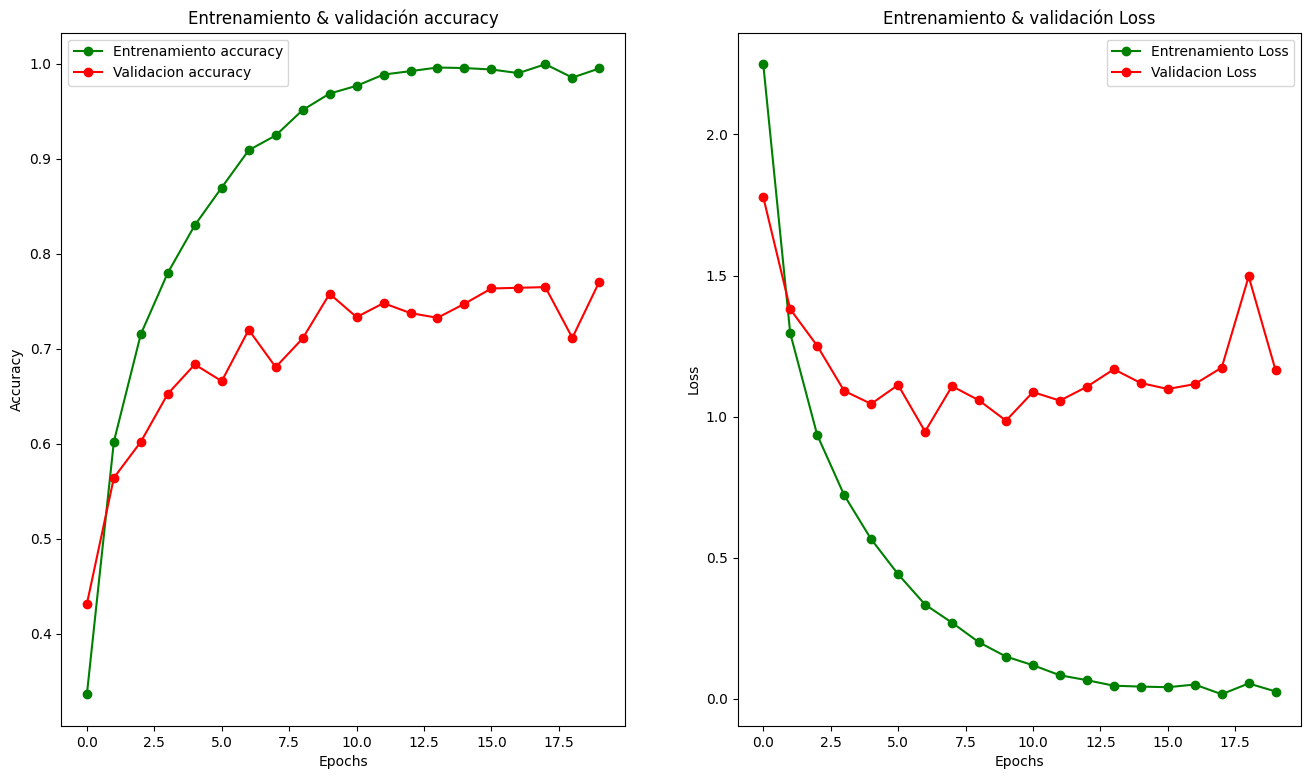

In [32]:
visualizacion_resultados(history)

In [47]:
from tensorflow.keras import regularizers

In [44]:
model_optimizer = tf.keras.models.Sequential([
              tf.keras.layers.Flatten(input_shape= (28, 28, 1)),
              tf.keras.layers.Dense(256, kernel_regularizer=regularizers.l2(1e-5), activation = "relu"),
              tf.keras.layers.Dropout(0.2),
              tf.keras.layers.Dense(128, kernel_regularizer=regularizers.l2(1e-5), activation = "relu"),
              tf.keras.layers.Dropout(0.2),
              tf.keras.layers.Dense(len(classes), activation = "softmax")
])

model_optimizer.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_5 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 256)                 │         200,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 24)                  │           3,096 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 236,952 (925.59 KB)

 Trainable params: 236,952 (925.59 KB)

 Non-trainable params: 0 (0.00 B)

In [46]:
model_optimizer.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history_optimizer = model_optimizer.fit(
    train_generator,
    epochs=20,
    validation_data=validation_generator
)

Epoch 1/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 12s 46ms/step - accuracy: 0.1390 - loss: 2.8840 - val_accuracy: 0.4035 - val_loss: 1.8980
Epoch 2/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - accuracy: 0.4422 - loss: 1.7178 - val_accuracy: 0.5691 - val_loss: 1.3932
Epoch 3/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - accuracy: 0.5653 - loss: 1.3094 - val_accuracy: 0.6498 - val_loss: 1.1475
Epoch 4/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 10s 37ms/step - accuracy: 0.6431 - loss: 1.0610 - val_accuracy: 0.6674 - val_loss: 1.0695
Epoch 5/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 9s 33ms/step - accuracy: 0.7014 - loss: 0.8937 - val_accuracy: 0.7081 - val_loss: 0.9547
Epoch 6/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - accuracy: 0.7457 - loss: 0.7471 - val_accuracy: 0.7144 - val_loss: 0.9275
Epoch 7/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - accuracy: 0.7734 - loss: 0.6640 - val_accuracy: 0.7207 - val_loss: 0.8907
Epoch 8/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 9s 32ms/step - accuracy: 0.8024 - loss: 0.5924 - val_ac

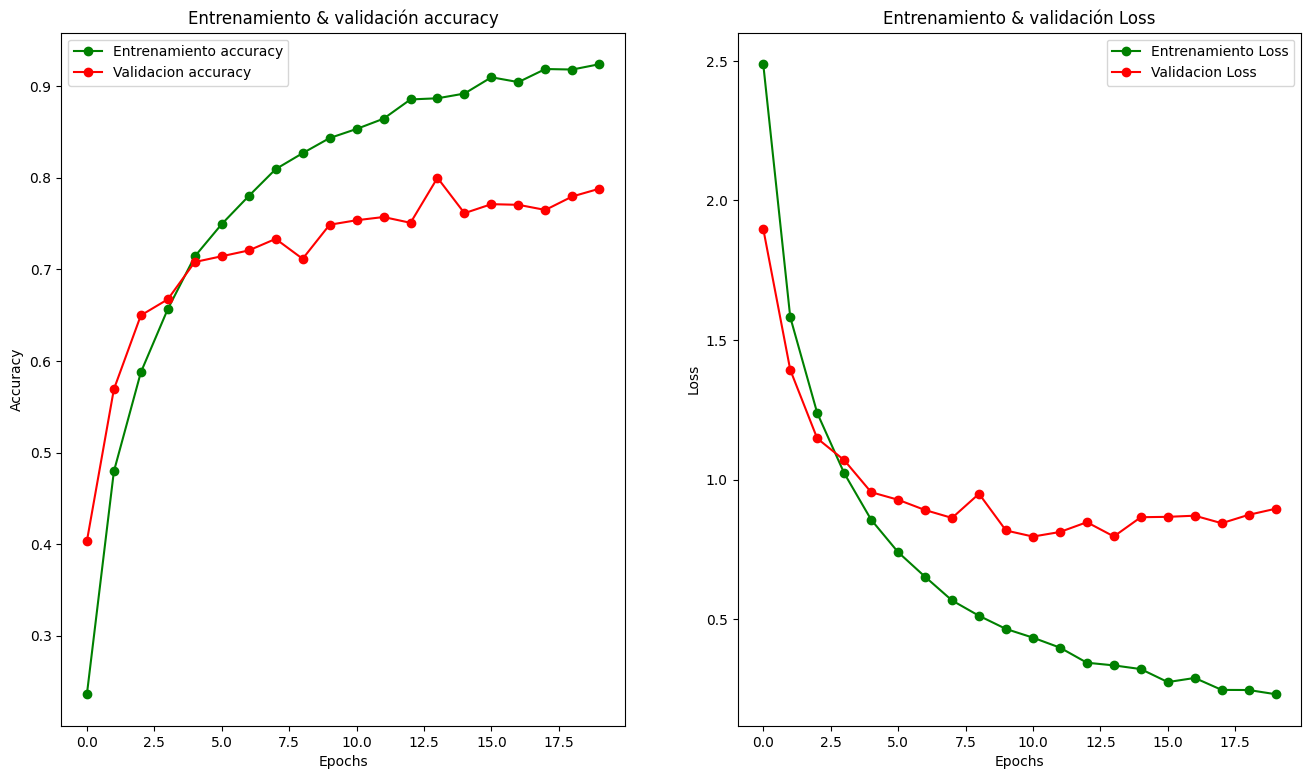

In [48]:
visualizacion_resultados(history_optimizer)